In [14]:
import pandas as pd
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use('seaborn')

In [3]:
df = pd.read_csv('swiss.csv', index_col=0)
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [4]:
df.columns = ['fertility', 'agri', 'exam', 'edu', 'catholic', 'infant_mortality']

In [5]:
#shortcut
model = 'fertility ~ %s'%(" + ".join(df.columns.values[1:]))
model

'fertility ~ agri + exam + edu + catholic + infant_mortality'

In [6]:
#linear regression
linear_regression = smf.ols(model, data = df).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           5.59e-10
Time:                        13:18:11   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           66.9152     10.706      6.250      0.000        45.294    88.536
agri                -0.1721      0.070     -2.448      0.019        -0.314    -0.030
exam                -0.2580      0.254     -1.016      0.315        -0.771     0.255
edu                 -0.8709      0.183     -4.758      0.000        -1.241    -0.501
catholic             0.1041      0.035      2.953      0.005         0.033     0.175
infant_mortality     1.0770      0.382      2.822      0.007         0.306     1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
linear_regression.params

Intercept           66.915182
agri                -0.172114
exam                -0.258008
edu                 -0.870940
catholic             0.104115
infant_mortality     1.077048
dtype: float64

In [8]:
linear_regression.conf_int()

,0,1
Intercept,45.293900,88.536463
agri,-0.314096,-0.030132
exam,-0.770726,0.254709
edu,-1.240574,-0.501306
catholic,0.032911,0.175320
infant_mortality,0.306150,1.847947


In [9]:
std_err = linear_regression.params - linear_regression.conf_int()[0]
std_err

Intercept           21.621281
agri                 0.141982
exam                 0.512717
edu                  0.369634
catholic             0.071205
infant_mortality     0.770898
dtype: float64

In [10]:
#means, std errors, confidence intervals
bd_df = pd.DataFrame({'coef': linear_regression.params.values[1:], 'err': std_err.values[1:], 'name': std_err.index.values[1:]})
bd_df

,coef,err,name
0,-0.172114,0.141982,agri
1,-0.258008,0.512717,exam
2,-0.870940,0.369634,edu
3,0.104115,0.071205,catholic
4,1.077048,0.770898,infant_mortality


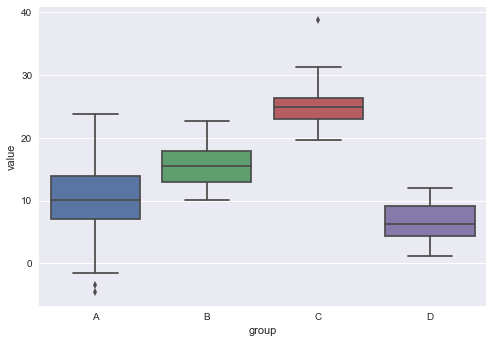

In [15]:
#basic plots
#boxplots and fixing them
 
# fake data:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
sns.boxplot(x='group', y='value', data=df)

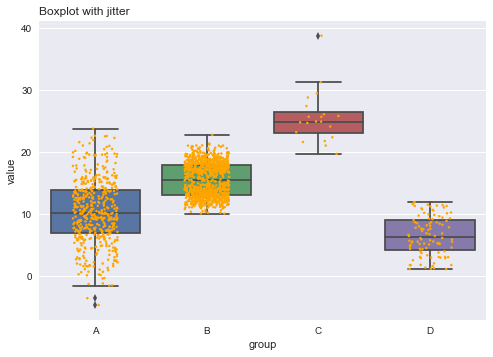

In [16]:
#correction: adding jitter
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")

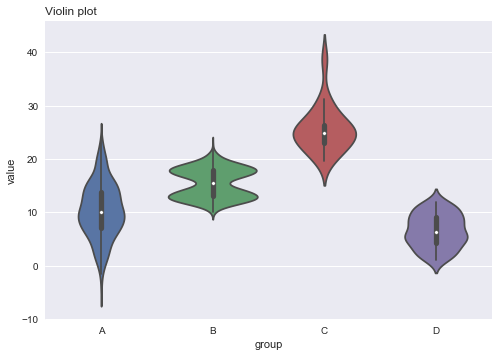

In [17]:
#correction: building violin plots
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


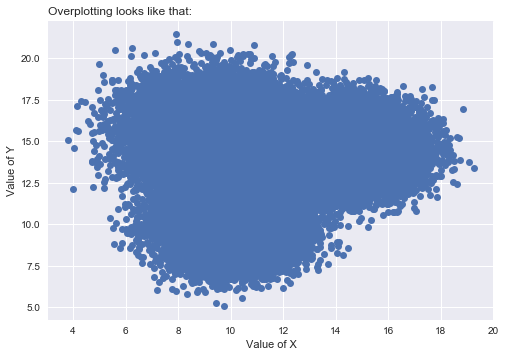

In [18]:
#avoiding clutter and overplotting
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')
 
# Dataset:
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='', marker='o')
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting looks like that:', loc='left')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


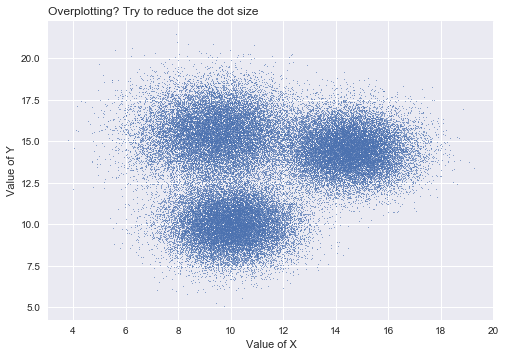

In [19]:
#correction: change dot size
# Plot with small marker size
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


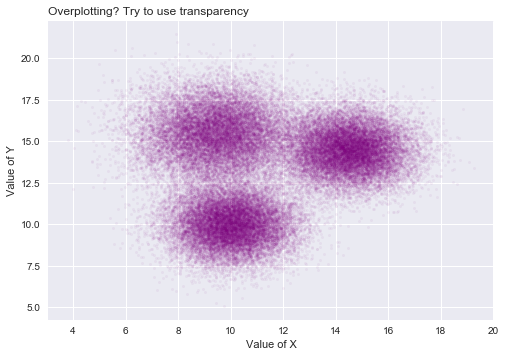

In [20]:
#correction: change transparency
# Plot with transparency
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to use transparency', loc='left')

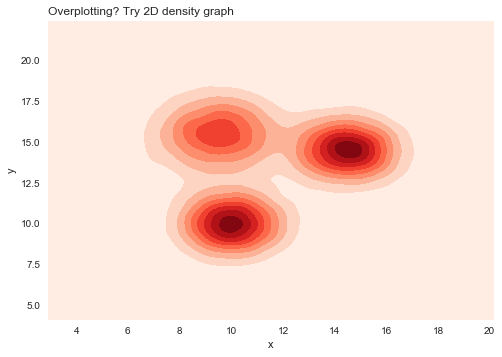

In [21]:
#correction:Adding density
# 2D density plot:
sns.kdeplot(df.x, df.y, cmap="Reds", shade=True)
plt.title('Overplotting? Try 2D density graph', loc='left')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


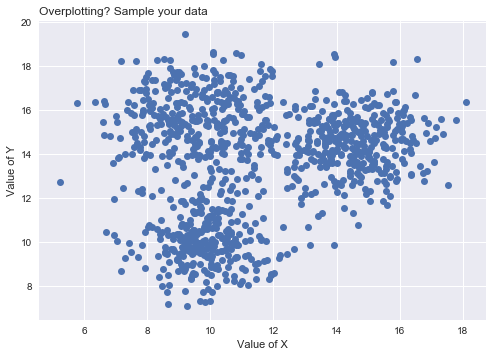

In [22]:
#correction: random sampling
# Sample 1000 random lines
df_sample=df.sample(1000)
 
# Make the plot with this subset
plt.plot( 'x', 'y', data=df_sample, linestyle='', marker='o')
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Sample your data', loc='left')

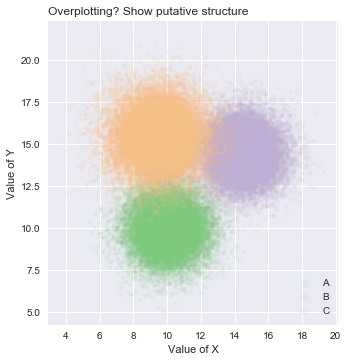

In [23]:
# Plot
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='group', legend=False, palette="Accent", scatter_kws={"alpha":0.1,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Show putative structure', loc='left')
